# TFG sobre Herramienta para la Medicina de Precisión

### Ejercicios tipo para agilizar el manejo de Python

####  Leer y procesar secuencias de aminoácidos

In [19]:
#1. Leer secuencia desde un archivo
 
with open("secuencia.txt", "r") as archivo: # r para modo lectura
    secuencia = archivo.read().strip() #read() obtener sec como texto y strip() elimina espacios en blanco


longitud = len(secuencia)

print(f"La secuencia es: {secuencia}") # f"....{}..."  --> tener en cuenta para dar los resultados de forma clara y visual
print(f"Número de aminoácidos: {longitud}")


La secuencia es: ACDEFGHIKLMNPQRSTVWY
Número de aminoácidos: 20


In [20]:
#2.  Contar cuántas veces aparece un aminoácido específico
aminoacido = "L"

contar = secuencia.count(aminoacido)

print(contar)

1


In [21]:
#3. Paso de letras a nombres de aminoacidos

# IMPORTANTE, EL SIGUIENTE DICCIONARIO, LE PODRE UTILIZAR EN EL FUTURO
# CONTIENE TODOS LOS AMINOACIDOS

nombres_aminoacidos = {
    "A": "Alanina", "C": "Cisteína", "D": "Ácido aspártico", 
    "E": "Ácido glutámico", "F": "Fenilalanina", "G": "Glicina", 
    "H": "Histidina", "I": "Isoleucina", "K": "Lisina", 
    "L": "Leucina", "M": "Metionina", "N": "Asparagina", 
    "P": "Prolina", "Q": "Glutamina", "R": "Arginina", 
    "S": "Serina", "T": "Treonina", "V": "Valina", 
    "W": "Triptófano", "Y": "Tirosina"}

seq = "ACDEFG"

traducir = [nombres_aminoacidos[i] for i in seq] #los corchestes que engloban sirben para agrupar el resultado en una lista
print(traducir)

['Alanina', 'Cisteína', 'Ácido aspártico', 'Ácido glutámico', 'Fenilalanina', 'Glicina']


In [22]:
#4. Obtener los aminoacidos validos a partir del diccionario anterior
aa_validos = set(nombres_aminoacidos.keys()) # Con set() lo que hacemos es crear un conjunto, que se caracteriza por no tener un orden y no tener duplicados, mejor que list
print(aa_validos)

#aa_validos IMPORTANTE ,LO PODRÉ UTILIZAR EN POSTERIORMENTE PARA HACER MÁS CONSULTAS, YA QUE CONTIENE TODOS LOS AA 

{'P', 'Y', 'M', 'H', 'N', 'C', 'R', 'W', 'K', 'S', 'V', 'F', 'L', 'D', 'E', 'T', 'I', 'Q', 'A', 'G'}


In [23]:
# Secuencia de ejemplo
secuencia = ""

# Conjunto de aminoácidos válidos
aminoacidos_validos = set("ACDEFGHIKLMNPQRSTVWY")

# Validar la secuencia
es_valida = all(aa in aminoacidos_validos for aa in secuencia)

if es_valida:
    print("La secuencia es válida.")
else:
    print("La secuencia contiene caracteres no válidos.")


La secuencia es válida.


In [24]:
#5. Comprobar si una secuencia contiene solo aminoácidos válidos
seq = "ACDGXHT" # x no es un aa

# Validar la secuencia
es_valida = all(aa in aa_validos for aa in seq) #all() para verificar que cada caracter esta en el conjunto
#El bucle recorre que cada aa de seq este dentro de aa_validos. Si es así all() delvuelve  es_valida = True
if es_valida:
    print("La secuencia es válida.")
else:
    print("La secuencia contiene caracteres no válidos.")

La secuencia contiene caracteres no válidos.


In [25]:
#6. Comparar entre dos secuencias cuantos aa son diferentes (mutación)
seq_ok = "ACDGHTELHSAD"
seq_mal = "ACDGHTEGHSGG"

mutacion = sum(1 for aa1, aa2 in zip(seq_ok, seq_mal) if aa1 != aa2)
# Con zip() emparejamos los amonoazidos de las dos secuencias 
print(mutacion)

3


In [26]:
#7.  Encontrar subsecuencias
# Secuencia de ejemplo
secuencia = "ACDEFGHIKLMNPQRSTVWYACD"

subsecuencia = "ACD"

posiciones = []
contador_subsecuencias = 0

for i in range(len(secuencia) - len(subsecuencia) + 1):
    if secuencia[i:i + len(subsecuencia)] == subsecuencia:
        posiciones.append(i)  # Agregamos la posición a la lista desde donde parte la subsec
        contador_subsecuencias += 1 

if contador_subsecuencias > 0:
    print(f"El patrón '{subsecuencia}' aparece {contador_subsecuencias} veces en las posiciones: {posiciones}")
else:
    print(f"El patrón '{subsecuencia}' no se encuentra en la secuencia.")

El patrón 'ACD' aparece 2 veces en las posiciones: [0, 20]


In [27]:
#8. Comparar una secuencia con varias de un carchivo
secuencia_correcta = "ACDEFGHIKLMNPQRSTVWY"

# Función para cargar secuencias desde cualquier archivo
def cargar_secuencias(nombre_archivo):
    with open(nombre_archivo, 'r') as file:
        return [line.strip() for line in file.readlines()] #file.readlines() lee todas las lineas, y devuelve una lista

# Función para analizar las secuencias
def analizar_secuencias(secuencia_correcta, secuencias):
    for idx, secuencia in enumerate(secuencias):  # idx sirve paar asirnar un numero a cada secuencia
        print(f"\nSecuencia {idx + 1}: {secuencia}")

        # Caso 1: Comparación completa
        if secuencia == secuencia_correcta:
            print("→ Coincide completamente con la secuencia correcta.")
            continue

        # Caso 2: Buscar fragmentos que coincidan
        fragmento_mas_largo = ""

        for i in range(len(secuencia)):
            for j in range(i + 1, len(secuencia) + 1):
                fragmento = secuencia[i:j]
                if fragmento in secuencia_correcta and len(fragmento) > len(fragmento_mas_largo):
                    fragmento_mas_largo = fragmento

        # Mostrar resultados
        if fragmento_mas_largo:
            print(f"→ No coincide completamente, pero contiene el siguiente fragmento válido:")
            print(f"   - Fragmento '{fragmento_mas_largo}'")
            print(f"→ Número de patrones encontrados: 1")
        else:
            print("→ No tiene fragmentos válidos.")

# Cargar las secuencias desde el archivo
secuencias = cargar_secuencias('secuencias.txt')

# Llamar a la función para analizar las secuencias
analizar_secuencias(secuencia_correcta, secuencias)



Secuencia 1: ACDEFGHIKLMNPQ
→ No coincide completamente, pero contiene el siguiente fragmento válido:
   - Fragmento 'ACDEFGHIKLMNPQ'
→ Número de patrones encontrados: 1

Secuencia 2: ACDEFXXIKLMNPQRSTVWY
→ No coincide completamente, pero contiene el siguiente fragmento válido:
   - Fragmento 'IKLMNPQRSTVWY'
→ Número de patrones encontrados: 1

Secuencia 3: FGHIKLMN
→ No coincide completamente, pero contiene el siguiente fragmento válido:
   - Fragmento 'FGHIKLMN'
→ Número de patrones encontrados: 1

Secuencia 4: XXACDEFGHIKLMNPQRSTVWY
→ No coincide completamente, pero contiene el siguiente fragmento válido:
   - Fragmento 'ACDEFGHIKLMNPQRSTVWY'
→ Número de patrones encontrados: 1

Secuencia 5: ACDEFGHIKLMNPQRSTVWYY
→ No coincide completamente, pero contiene el siguiente fragmento válido:
   - Fragmento 'ACDEFGHIKLMNPQRSTVWY'
→ Número de patrones encontrados: 1


In [28]:
#9. Contar la frecuencias de aminoácidos
secuencia = "ACDEFGHIKLMNPQRSTVWYACDEFGHIK"

def contar_frecuencia(secuencia):
    frecuencias = {}
    for aminoacido in secuencia:
        if aminoacido in frecuencias:
            frecuencias[aminoacido] += 1
        else:
            frecuencias[aminoacido] = 1
    return frecuencias


frecuencias = contar_frecuencia(secuencia)
print("Frecuencia de aminoácidos:")
for aminoacido, frecuencia in frecuencias.items():
    print(f"{aminoacido}: {frecuencia}")


Frecuencia de aminoácidos:
A: 2
C: 2
D: 2
E: 2
F: 2
G: 2
H: 2
I: 2
K: 2
L: 1
M: 1
N: 1
P: 1
Q: 1
R: 1
S: 1
T: 1
V: 1
W: 1
Y: 1


In [29]:
#10. Indicaar mutaciones en múltiples secuencias
secuencia_correcta = "ACDEFGHIKLMNPQRSTVWY"

def cargar_secuencias(nombre_archivo):
    with open(nombre_archivo, 'r') as file:
        return [line.strip() for line in file.readlines()]

# Función para identificar mutaciones
def identificar_mutaciones(secuencia_correcta, secuencias):
    for idx, secuencia in enumerate(secuencias): #Con enumerate() llevamos un conteo del indice
        print(f"\nSecuencia {idx + 1}: {secuencia}")
        if len(secuencia) != len(secuencia_correcta):
            print("→ Longitud diferente: no se puede analizar.")
            continue
        
        mutaciones = []
        for i, (aa_ref, aa_seq) in enumerate(zip(secuencia_correcta, secuencia)): #Con zip() emparejamos las 2 secuencias
            if aa_ref != aa_seq:
                mutaciones.append((i, aa_ref, aa_seq))
        
        if mutaciones:
            print(f"→ Mutaciones encontradas en posiciones: {mutaciones}")
        else:
            print("→ Secuencia sin mutaciones.")
            
# Cargar las secuencias desde un archivo y analizar
secuencias = cargar_secuencias('secuencias.txt')
identificar_mutaciones(secuencia_correcta, secuencias)



Secuencia 1: ACDEFGHIKLMNPQ
→ Longitud diferente: no se puede analizar.

Secuencia 2: ACDEFXXIKLMNPQRSTVWY
→ Mutaciones encontradas en posiciones: [(5, 'G', 'X'), (6, 'H', 'X')]

Secuencia 3: FGHIKLMN
→ Longitud diferente: no se puede analizar.

Secuencia 4: XXACDEFGHIKLMNPQRSTVWY
→ Longitud diferente: no se puede analizar.

Secuencia 5: ACDEFGHIKLMNPQRSTVWYY
→ Longitud diferente: no se puede analizar.


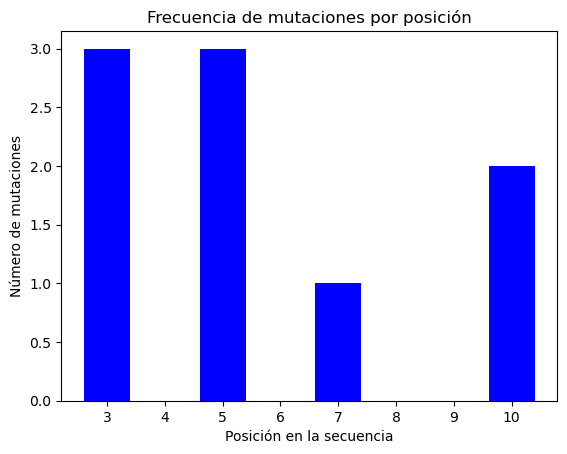

In [35]:
#11. Visualizar patrones de mutaciones con gráficos

import matplotlib.pyplot as plt

# Ejemplo de posiciones de mutaciones
mutaciones = [3, 5, 5, 7, 10, 3, 5, 10, 3] 

# Función para contar mutaciones por posición
def contar_mutaciones(mutaciones):
    conteo = {}
    for posicion in mutaciones:
        if posicion in conteo:
            conteo[posicion] += 1
        else:
            conteo[posicion] = 1
    return conteo

# Función para graficar mutaciones
def graficar_mutaciones(conteo):
    posiciones = list(conteo.keys())
    cantidades = list(conteo.values())
    
    plt.bar(posiciones, cantidades, color='blue')
    plt.xlabel("Posición en la secuencia")
    plt.ylabel("Número de mutaciones")
    plt.title("Frecuencia de mutaciones por posición")
    plt.show()

# Procesar y graficar
conteo_mutaciones = contar_mutaciones(mutaciones)
graficar_mutaciones(conteo_mutaciones)


### Ahora practicaremos con genes 

In [54]:
# Transcripción (ADN --> ARNm)
def transcribir_adn(adn):
    return adn.replace("T", "U")

adn = "ATCGTACAA"

arn = transcribir_adn(adn)
print(arn)

AUCGUACAA


In [55]:
# Traducción (ARNm --> Cadena de AA)

# IMPORTANTE, AQUI ESTA TODA LA RELACIÓN CONDOÓN - AA
codon_tabla = {
    'AUG': 'M',  # Metionina
    'UUU': 'F',  # Fenilalanina
    'UUC': 'F',  # Fenilalanina
    'UUA': 'L',  # Leucina
    'UUG': 'L',  # Leucina
    'CUU': 'L',  # Leucina
    'CUC': 'L',  # Leucina
    'CUA': 'L',  # Leucina
    'CUG': 'L',  # Leucina
    'AUU': 'I',  # Isoleucina
    'AUC': 'I',  # Isoleucina
    'AUA': 'I',  # Isoleucina
    'GUU': 'V',  # Valina
    'GUC': 'V',  # Valina
    'GUA': 'V',  # Valina
    'GUG': 'V',  # Valina
    'UCU': 'S',  # Serina
    'UCC': 'S',  # Serina
    'UCA': 'S',  # Serina
    'UCG': 'S',  # Serina
    'CCU': 'P',  # Prolina
    'CCC': 'P',  # Prolina
    'CCA': 'P',  # Prolina
    'CCG': 'P',  # Prolina
    'ACU': 'T',  # Treonina
    'ACC': 'T',  # Treonina
    'ACA': 'T',  # Treonina
    'ACG': 'T',  # Treonina
    'GCU': 'A',  # Alanina
    'GCC': 'A',  # Alanina
    'GCA': 'A',  # Alanina
    'GCG': 'A',  # Alanina
    'UAU': 'Y',  # Tirosina
    'UAC': 'Y',  # Tirosina
    'CAU': 'H',  # Histidina
    'CAC': 'H',  # Histidina
    'CAA': 'Q',  # Glutamina
    'CAG': 'Q',  # Glutamina
    'AAU': 'N',  # Asparagina
    'AAC': 'N',  # Asparagina
    'AAA': 'K',  # Lisina
    'AAG': 'K',  # Lisina
    'GAU': 'D',  # Ácido aspártico
    'GAC': 'D',  # Ácido aspártico
    'GAA': 'E',  # Ácido glutámico
    'GAG': 'E',  # Ácido glutámico
    'UGU': 'C',  # Cisteína
    'UGC': 'C',  # Cisteína
    'UGG': 'W',  # Triptófano
    'UGA': 'STOP',  # Codón de parada
    'UAA': 'STOP',  # Codón de parada
    'UAG': 'STOP',  # Codón de parada
    'CGU': 'R',  # Arginina
    'CGC': 'R',  # Arginina
    'CGA': 'R',  # Arginina
    'CGG': 'R',  # Arginina
    'AGA': 'R',  # Arginina
    'AGG': 'R'   # Arginina
}

def traducir_arn(arn):
    aminoacidos = []
    for i in range(0, len(arn), 3):
        codon = arn[i:i+3]
        if codon_tabla.get(codon) == 'STOP':
            break
        aminoacidos.append(codon_tabla.get(codon, '-')) # - para cuando no es multiplo de 3 o hay caracteres que no son nucleotidos
    return ''.join(aminoacidos)

print(traducir_arn(arn))

IVQ


In [59]:
#12. Identificar genes en una secuencia de ADN (inicio y fin)

def encontrar_genes(adn):
    genes = []
    i = 0
    while i < len(adn) - 2:
        if adn[i:i+3] == "ATG":  # Inicio de un gen
            for j in range(i + 3, len(adn) - 2, 3):
                if adn[j:j+3] in ["TAA", "TAG", "TGA"]:  # Codón de parada
                    genes.append(adn[i:j+3])
                    i = j
                    break
        i += 1
    return genes

adn = "ATGCGATAATGAAATAG"
genes = encontrar_genes(adn)
print(genes)

['ATGCGATAA', 'ATGAAATAG']


In [61]:
#13. Calcular el numero de GC (importante para estudiar estabilidad)
def calcular_gc_content(adn):
    gc = adn.count('G') + adn.count('C')
    return (gc / len(adn)) * 100

GC_porcen = calcular_gc_content(adn)
print(GC_porcen)

29.411764705882355


ATGCGATAATGAAATAG


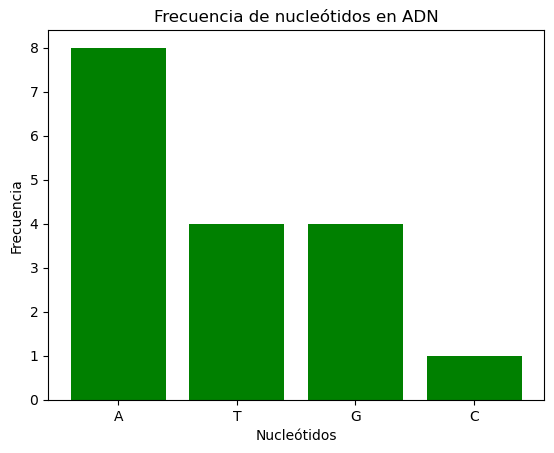

In [ ]:
#14. Graficar contenido de nucleótidos

print(adn)
import matplotlib.pyplot as plt

def graficar_nucleotidos(adn):
    conteo = {
        'A': adn.count('A'),
        'T': adn.count('T'),
        'G': adn.count('G'),
        'C': adn.count('C')
    }
    nucleotidos = list(conteo.keys())
    cantidades = list(conteo.values())
    
    plt.bar(nucleotidos, cantidades, color='green')
    plt.xlabel("Nucleótidos")
    plt.ylabel("Frecuencia")
    plt.title("Frecuencia de nucleótidos en ADN")
    plt.show()


graficar_nucleotidos(adn)
